<a href="https://colab.research.google.com/github/ioloi1128/CDA/blob/main/CDA_week4_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

Read data

In [3]:
#read nino3.4 index
ds_oni = xr.open_dataset("ENSOindex.oni.1960-2020.nc")
ds_oni = ds_oni.sel(time=slice('1979', '2019'))
#ds_oni['sst'].plot()

#read SST
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds_sst = xr.open_dataset(url)
ds_sst = ds_sst.sel(time=slice('1979', '2019'))
ds_sst.load()
#ds_sst

#read precipitation
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/gpcp/precip.mon.mean.nc'
ds_prec = xr.open_dataset(url)
ds_prec = ds_prec.sel(time=slice('1979', '2019'))
ds_prec.load()
ds_prec

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, time: 492, nv: 2)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-01-01
    lat_bnds   (lat, nv) float32 -90.0 -87.5 -87.5 -85.0 ... 85.0 87.5 87.5 90.0
    lon_bnds   (lon, nv) float32 0.0 2.5 2.5 5.0 5.0 ... 355.0 357.5 357.5 360.0
    precip     (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.1305 0.1327 0.1341
Attributes: (12/20)
    Conventions:                     CF-1.0
    curator:                         Dr. Jian-Jian Wang\nESSIC, University of...
    citation:                        Adler, R.F., G.J. Huffman, A. Chang, R. ...
    title:                           GPCP Version 2.3 Combined Precipitation ...
    platform:                        NOAA POES (Polar Orbiting Environmental ...
    source_obs:                      CDR RSS SSMI/SSMIS Tbs over ocean \nCDR ...
    ...                              ...
    NCO:                             4.6.9
    history:                         Generated at NOAA/ESRL PSD Sep 9 2016 ba...
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    _NCProperties:                   version=2,netcdf=4.7.3,hdf5=1.10.6,
    data_comment:                    Interim data covers 2023/01 through latest.
    DODS_EXTRA.Unlimited_Dimension:  time

Goal: calculate the correlation of nino3.4 index and precipitation

In [18]:
# Make anomalies
ds_climo=ds_prec.groupby('time.month').mean()
ds_anoms=ds_prec.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, time: 492, nv: 2)
Coordinates:
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time      (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (time, lat, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lon_bnds  (time, lon, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    precip    (time, lat, lon) float32 -0.02191 -0.03154 ... -0.2816 -0.2292

Part I: correlation of time series

In [19]:
# choose one point timeseries
pt=ds_anoms.sel(lat=0,lon=360-180,method='nearest')

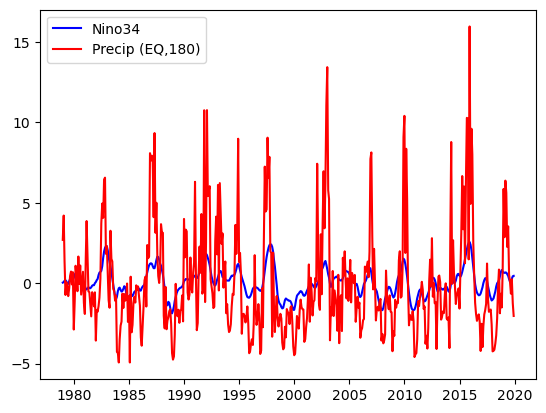

In [22]:
#line plot 
plt.plot(ds_oni['time'],ds_oni['sst'],'b')
plt.plot(pt['time'],pt['precip'],'r')
plt.legend(['Nino34','Precip (EQ,180)'])

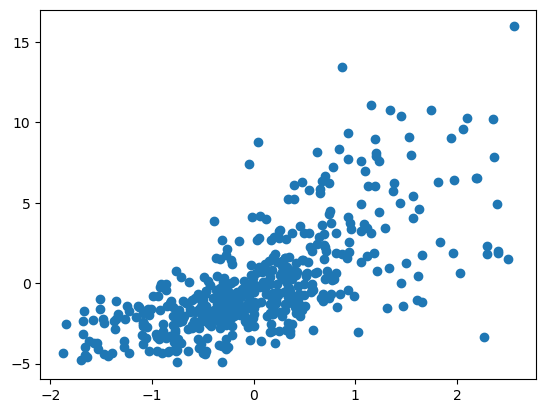

In [23]:
#scatter plot 
plt.scatter(ds_oni['sst'],pt['precip'])
plt.show()

In [24]:
#numpy correlation function
R=np.corrcoef(ds_oni['sst'],pt['precip'])
R

array([[1.        , 0.68217385],
       [0.68217385, 1.        ]])

In [25]:
corr=R[0,1]
corr

0.6821738524507356

In [26]:
#scipy correlation function 
(rvalue, pvalue) =  scipy.stats.pearsonr(ds_oni['sst'],pt['precip'])
rvalue

0.6821738524507361

In [27]:
pvalue

1.248935524935964e-68

Maker figure nicer!

Text(1.0, 1.0, 'R= 0.68*')

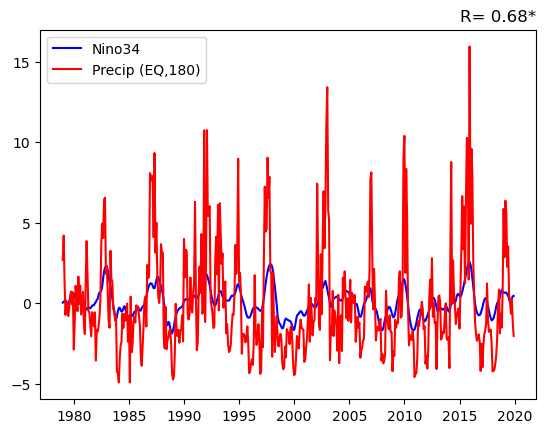

In [28]:
plt.plot(ds_oni['time'],ds_oni['sst'],'b')
plt.plot(pt['time'],pt['precip'],'r')
plt.legend(['Nino34','Precip (EQ,180)'])

rvalue_2 = round(rvalue, 2)
stuff_in_string = f"R= {rvalue_2}*"

#print(stuff_in_string)
plt.title(stuff_in_string,loc='right')

In [1]:
plt.scatter(ds_oni['sst'],pt['precip'], s=10, color="green")
plt.title(stuff_in_string,loc='right')

m, b = np.polyfit(ds_oni['sst'],pt['precip'], 1)
plt.plot(ds_oni['sst'], m*ds_oni['sst'] + b, color="red",linewidth=3)
plt.xlabel("Nino 3.4")
plt.ylabel("Precipitation")

plt.show()

NameError: name 'plt' is not defined

PartII: Correlation of map

In [30]:
#Method I: xarray
r_map=xr.corr(ds_oni['sst'],ds_anoms['precip'],dim='time')
r_map

<xarray.DataArray (lat: 72, lon: 144)>
array([[-0.05140636, -0.06615894, -0.05118895, ..., -0.02226607,
        -0.07726013, -0.06092319],
       [-0.0576908 , -0.05754686, -0.05833357, ..., -0.06514323,
        -0.09003456, -0.0813975 ],
       [-0.06466316, -0.06029999, -0.06543243, ..., -0.08571   ,
        -0.07169419, -0.06564035],
       ...,
       [-0.00035857, -0.00537147, -0.00089411, ..., -0.01450403,
        -0.01402515, -0.01359048],
       [-0.00940156, -0.0140326 , -0.01687367, ..., -0.0229103 ,
        -0.01719273, -0.01185767],
       [-0.02066927, -0.03160723, -0.03752905, ..., -0.05029156,
        -0.03114019, -0.02794372]])
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8

Text(0.5, 1.0, 'Correlation between Nino3.4 and Precipitation Anomalies')

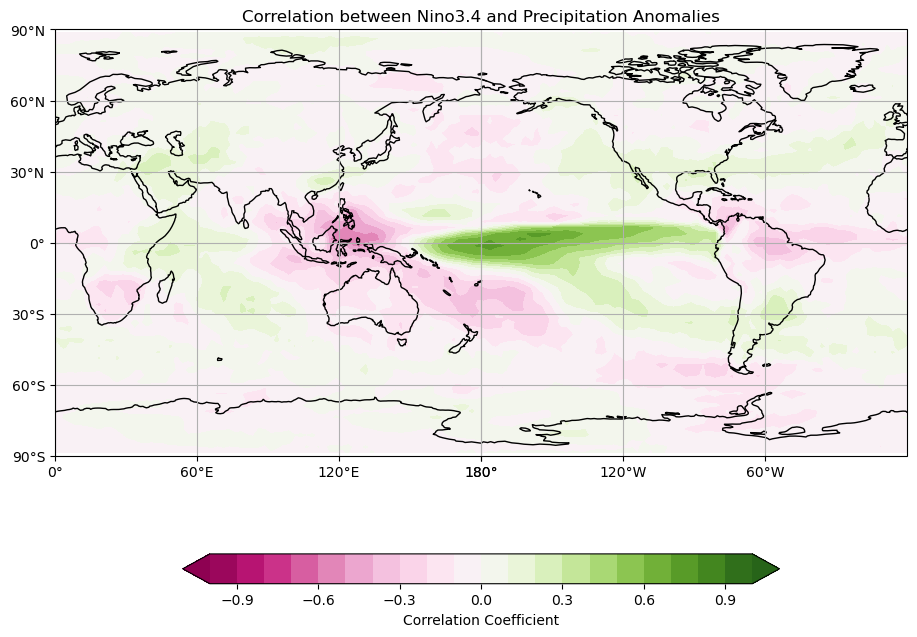

In [31]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=r_map
data,lon=add_cyclic_point(r_map,coord=ds_anoms['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,ds_anoms['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='PiYG',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Nino3.4 and Precipitation Anomalies')

In [32]:
#Method II: scipy
from scipy.stats import pearsonr

In [33]:
nx=len(ds_anoms['lon'])
ny=len(ds_anoms['lat'])

p_array=np.zeros((ny,nx))
r_array=np.zeros((ny,nx))

for i in range(nx):
    for j in range(ny):
        r,p=pearsonr(ds_oni['sst'],ds_anoms['precip'][:,j,i])
        r_array[j,i]=r
        p_array[j,i]=p
r_array.shape

(72, 144)

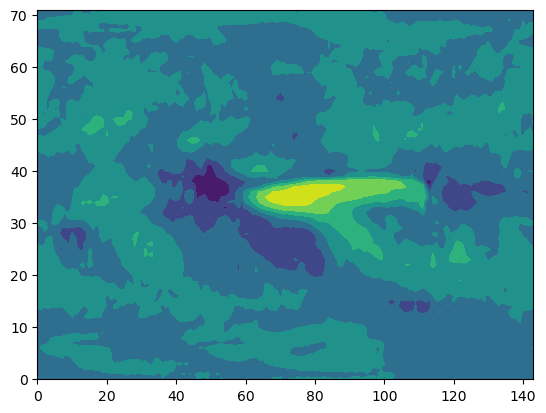

In [34]:
plt.contourf(r_array)

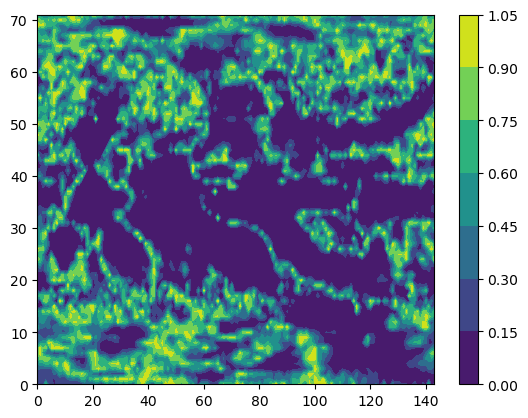

In [35]:
plt.contourf(p_array)
plt.colorbar()

In [36]:
mask_sig=np.where(p_array<0.05,r_array,np.nan)

Text(1.0, 1.0, '95% sig.')

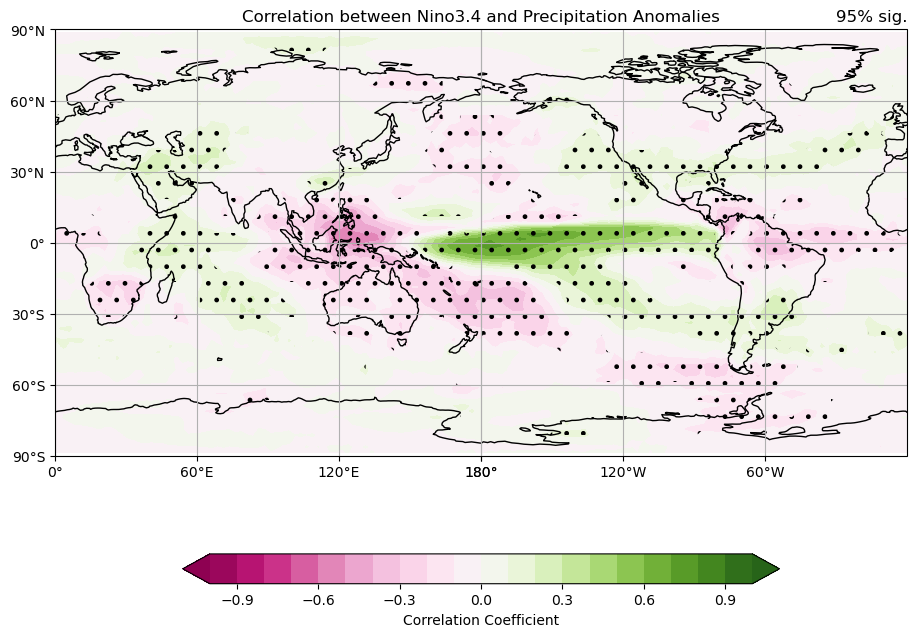

In [38]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=r_array
data,lon=add_cyclic_point(data,coord=ds_anoms['lon'])
mask_data,lons=add_cyclic_point(mask_sig,coord=ds_anoms['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,ds_anoms['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='PiYG',extend='both')

ax.contourf(lon,ds_anoms['lat'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['.','.'],extend='both',alpha=0)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Nino3.4 and Precipitation Anomalies')
plt.title('95% sig.',loc='right')